# Data Exploration & Visualization

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', nrows=5_000_000)
df.shape

(5000000, 8)

In [3]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## Data Cleanup

In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


I see some anomalies in the data. Here they are:
- The minimum fare_amount is negative which is not possible. 
- The min passenger count is 0. There should be at least one passenger taking this ride.
- longitude and lattitudes are way beyond the allowable range of longitude and lattitude coordinates.

In the following few steps, I will remove these rows from my data.

### Remove the rows where fare_amount is invalid

In [6]:
print(f'Size Before Removing: {df.shape}')
df = df[df.fare_amount > 0]
print(f'Size After Removing: {df.shape}')

Size Before Removing: (5000000, 8)
Size After Removing: (4999657, 8)


Let's check for any possible outliers in the data based on fare_amount.

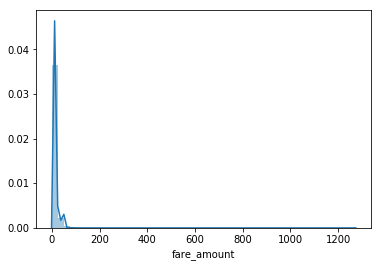

In [7]:
sns.distplot(df.fare_amount)

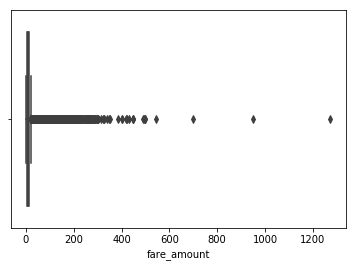

In [8]:
sns.boxplot(df.fare_amount)

In the boxplot above, I can see that there are many outliers. Lets quatify them using IQR method.

In [9]:
q1,q2,q3 = df.fare_amount.quantile([0.25,0.50,0.75])
iqr = q3 - q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

In [10]:
df_after_outliers = df[(df.fare_amount > lower_range) & (df.fare_amount < upper_range)]

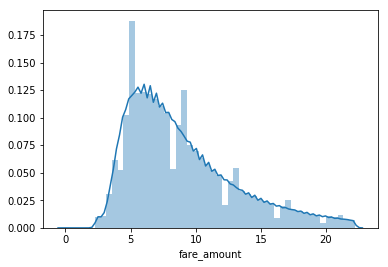

In [11]:
sns.distplot(df_after_outliers.fare_amount)

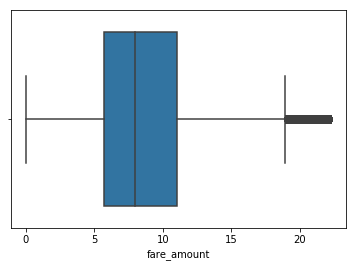

In [12]:
sns.boxplot(df_after_outliers.fare_amount)

In [13]:
len(df) - len(df_after_outliers)

430420

It is always a tough decision to make for removing the outliers from the data. And in my case, this is a significant amount of data to be removed. Let's not remove it for now.

In [14]:
del df_after_outliers

In [15]:
df = df[df.fare_amount <= 200]

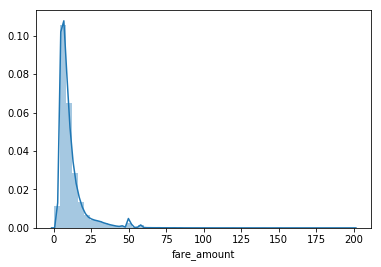

In [17]:
sns.distplot(df.fare_amount)

###  Remove the rows with invalid passenger count

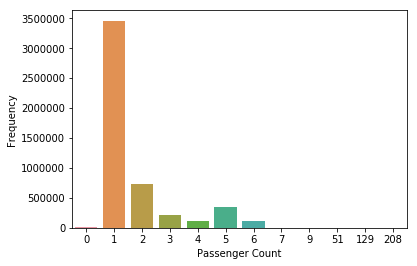

In [18]:
p_count = df.groupby(by = 'passenger_count').count()
sns.barplot(p_count.index, p_count['key'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

Remove the rows with 0 passenger count

In [19]:
df = df[df.passenger_count > 0]
print(f'Size After Removing: {df.shape}')

Size After Removing: (4981855, 8)


As it is not possible to have more than 7 passengers having the same ride. I will remove the ones with the passenger count more than 7.

In [20]:
df = df[df.passenger_count <=7]
print(f'Size After Removing: {df.shape}')

Size After Removing: (4981844, 8)


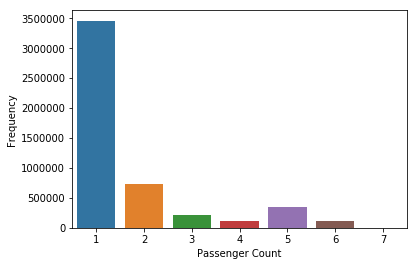

In [21]:
p_count = df.groupby(by = 'passenger_count').count()
sns.barplot(p_count.index, p_count['key'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

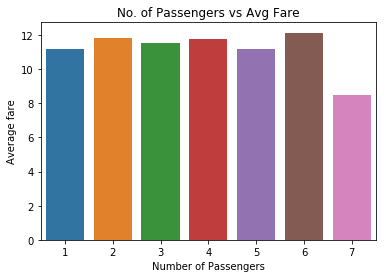

In [22]:
p_count = df.groupby(by = 'passenger_count')['fare_amount'].mean().reset_index()
sns.barplot(p_count.passenger_count, p_count['fare_amount'])
plt.xlabel('Number of Passengers')
plt.ylabel('Average fare')
plt.title("No. of Passengers vs Avg Fare")
plt.show()

We can see average fare amount is lowest for 7 passengers and highest for 6 passengers.

### Remove any missing or duplicate data

In [23]:
#Check if there is any missing data. If present, remove.
df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

There are no rows with missing data in any column. Let's check for the duplicate rows.

In [24]:
#Check for any duplicates
df.duplicated().sum()

0

There are no duplicate rows.

### Check for the longitude and Lattitude Ranges

Lets draw longitude vs latitude scatter plots for pickup and dropoff location coordinates.

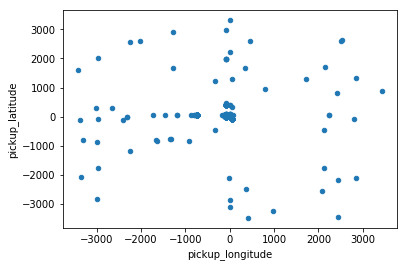

In [25]:
plot = df.plot.scatter('pickup_longitude', 'pickup_latitude')

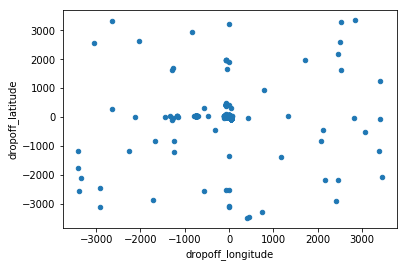

In [26]:
plot = df.plot.scatter('dropoff_longitude', 'dropoff_latitude')

In [27]:
print(f'Pickup Latitude range : {np.max(df.pickup_latitude)},{np.min(df.pickup_latitude)}')
print(f'Dropoff Latitude range : {np.max(df.dropoff_latitude)},{np.min(df.dropoff_latitude)}')

Pickup Latitude range : 3310.364462,-3488.079513
Dropoff Latitude range : 3345.9173530000003,-3488.079513


Allowable range of Latitude coordinates is from -90 to 90. So lets remove the ones outside this range.

In [28]:
print(f'Size Before Removing: {df.shape}')
df = df[(df.dropoff_latitude >= -90) & (df.dropoff_latitude <= 90)]
df = df[(df.pickup_latitude >= -90) & (df.pickup_latitude <= 90)]
print(f'Size After Removing : {df.shape}')

Size Before Removing: (4981844, 8)
Size After Removing : (4981726, 8)


In [29]:
print(f'Pickup Longitude range : {np.max(df.pickup_longitude)},{np.min(df.pickup_longitude)}')
print(f'Dropoff Longitude range : {np.max(df.dropoff_longitude)},{np.min(df.dropoff_longitude)}')

Pickup Longitude range : 2228.7386850000003,-2970.8735469999997
Dropoff Longitude range : 1328.72618,-2125.745368


Allowable range of Longitude coordinates is from -180 to 180. So lets remove the ones outside this range.

In [30]:
print(f'Size Before Removing: {df.shape}')
df = df[(df.dropoff_longitude >= -180) & (df.dropoff_longitude <= 180)]
df = df[(df.pickup_longitude >= -180) & (df.pickup_longitude <= 180)]
print(f'Size After Removing : {df.shape}')

Size Before Removing: (4981726, 8)
Size After Removing : (4981627, 8)


Also the pickup and drop off points cannot be same. Lets check if we have such data in our dataset.

In [31]:
print(f'Size Before Removing: {df.shape}')
df = df[(df.pickup_latitude != df.dropoff_latitude) & (df.pickup_longitude != df.dropoff_longitude)]
print(f'Size After Removing : {df.shape}')

Size Before Removing: (4981627, 8)
Size After Removing : (4837027, 8)


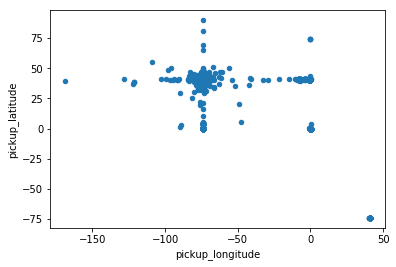

In [32]:
plot = df.plot.scatter('pickup_longitude', 'pickup_latitude')

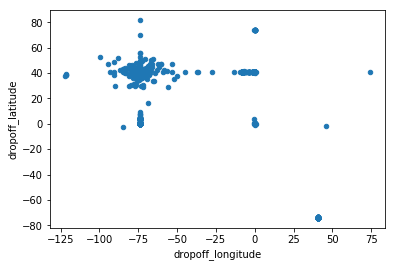

In [33]:
plot = df.plot.scatter('dropoff_longitude', 'dropoff_latitude')

As the rides are within the newyork city, so we can apply one more technique to further reduce the number of outliers. With the help of Google and latlong.net, I found a rough estimate of minimum and maximum coordinates of new york city. I will remove rows with the location coordinates outside this bound.

In [34]:
min_lat = 40.5
max_lat = 41.5
min_long = -74.2
max_long = -72.8

print(f'Size Before Removing: {df.shape}')
df = df[(df.dropoff_latitude >= min_lat) & (df.dropoff_latitude <= max_lat)]
df = df[(df.pickup_latitude >= min_lat) & (df.pickup_latitude <= max_lat)]
df = df[(df.dropoff_longitude >= min_long) & (df.dropoff_longitude <= max_long)]
df = df[(df.pickup_longitude >= min_long) & (df.pickup_longitude <= max_long)]
print(f'Size After Removing : {df.shape}')


Size Before Removing: (4837027, 8)
Size After Removing : (4821466, 8)


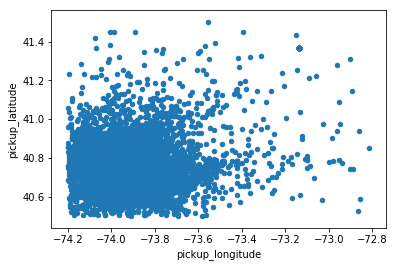

In [35]:
plot = df.plot.scatter('pickup_longitude', 'pickup_latitude')

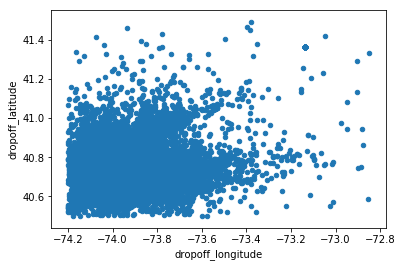

In [36]:
plot = df.plot.scatter('dropoff_longitude', 'dropoff_latitude')

### Feature Engineering

Lets add the most important feature for determining the fare amount - the distance between the pickup and drop-off points. The distance between two longitude and lattitude pairs can be calculated by using Haversine formula ( https://en.wikipedia.org/wiki/Haversine_formula).

In [37]:
from math import cos, asin, sqrt, radians

def hav_func(angle):
    return (1 - cos(radians(angle)))/2

def haversine_dist(lat1, lon1, lat2, lon2):
    h = hav_func(lat2 - lat1) + cos(radians(lat1)) * cos(radians(lat2)) * hav_func(lon2 - lon1)
    R = 6371 * 0.621371 # Radius of earth in miles
    d = 2*R*asin(sqrt(h))
    return d

In [38]:
df['trip_distance'] = df.apply(lambda row:\
    haversine_dist(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude), axis = 1)

Now, I will add some new features based on the datetime of the pickup.

In [40]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.250668
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863411
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.739385
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.242218


In [41]:
#Calculate date features
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, format='%Y-%m-%d %H:%M:%S UTC')
df['pickup_day'] = df.pickup_datetime.apply(lambda dt:dt.day)
df['pickup_hour'] = df.pickup_datetime.apply(lambda dt:dt.hour)
df['pickup_month'] = df.pickup_datetime.apply(lambda dt:dt.month)
df['pickup_year'] = df.pickup_datetime.apply(lambda dt:dt.year)
df['pickup_day_of_week'] = df.pickup_datetime.apply(lambda dt:dt.weekday())

I will try to find out the relation between the different pickup times and the fare amounts.

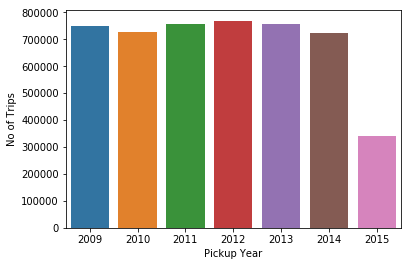

In [42]:
p_count = df.groupby(by = 'pickup_year').count()
sns.barplot(p_count.index, p_count['key'])
plt.xlabel('Pickup Year')
plt.ylabel('No of Trips')
plt.show()

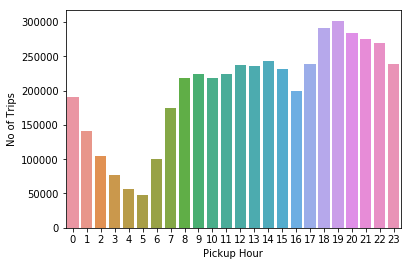

In [43]:
p_count = df.groupby(by = 'pickup_hour').count()
sns.barplot(p_count.index, p_count['key'])
plt.xlabel('Pickup Hour')
plt.ylabel('No of Trips')
plt.show()

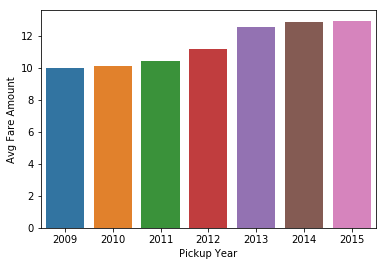

In [44]:
p_count = df.groupby(by = 'pickup_year')['fare_amount'].mean().reset_index()
sns.barplot(p_count.pickup_year, p_count.fare_amount)
plt.xlabel('Pickup Year')
plt.ylabel('Avg Fare Amount')
plt.show()

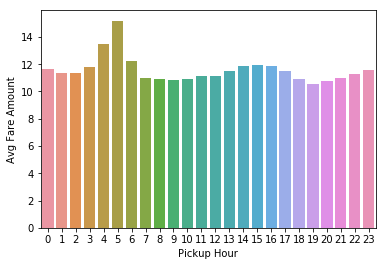

In [45]:
p_count = df.groupby(by = 'pickup_hour')['fare_amount'].mean().reset_index()
sns.barplot(p_count.pickup_hour, p_count.fare_amount)
plt.xlabel('Pickup Hour')
plt.ylabel('Avg Fare Amount')
plt.show()

From the above bar plots, we can see that average fare amount is increasing every year. Also we can see that the avg fare amount is more for the hours when number of rides is less. And it is less when then number of rides is more.

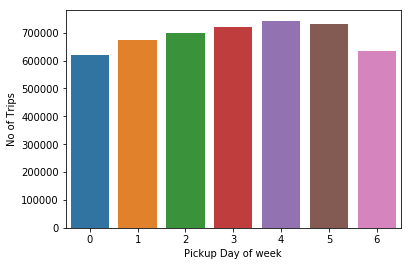

In [46]:
p_count = df.groupby(by = 'pickup_day_of_week').count()
sns.barplot(p_count.index, p_count['key'])
plt.xlabel('Pickup Day of week')
plt.ylabel('No of Trips')
plt.show()

We can see the trip count is higher on the friday. Lets see how the fare vaies with the weekday.

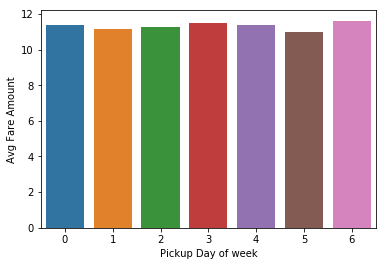

In [47]:
p_count = df.groupby(by = 'pickup_day_of_week')['fare_amount'].mean().reset_index()
sns.barplot(p_count.pickup_day_of_week, p_count.fare_amount)
plt.xlabel('Pickup Day of week')
plt.ylabel('Avg Fare Amount')
plt.show()

We can see the fare is highest on sunday when there are least number of trips.

### Finalizing the features

Now I will remove the unusable and redundant features.

In [50]:
df = df.drop(['key', 'pickup_datetime'], axis=1)

In [52]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'trip_distance', 'pickup_day', 'pickup_hour', 'pickup_month',
       'pickup_year', 'pickup_day_of_week'],
      dtype='object')

Now I will save the cleaned data in a new file so that I can reuse this data multiple time for different model trainings. Otherwise I will have to run the cleanup process again and again.

In [53]:
df.to_csv('train_clean.csv', index= False)